In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score

# Load and preprocess data for linear regression

In [2]:
from datasets import load_dataset

dataset = load_dataset("kailasv/ArtWhisperer", split='train')


Found cached dataset parquet (/Users/ekociubes/.cache/huggingface/datasets/kailasv___parquet/kailasv--ArtWhisperer-8e6557a66496a6c9/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


In [3]:
df = dataset.to_pandas()

In [4]:
df

,user_id,target_id,target_image,target_positive_prompt,target_negative_prompt,target_image_embedding,target_positive_text_embedding,target_negative_text_embedding,Famous person?,Famous landmark?,...,generated_negative_prompt,generated_image_embedding,generated_positive_text_embedding,generated_negative_text_embedding,ai_model_name,trajectory_index,score,human_rating,time_taken,filtered_image
0,000c5c4f,333289ce63f49e55,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,lush flowers in a crystal vase by jeremy mann ...,,"{'value': [0.011545462, -0.19846655, 0.0341740...","{'value': [0.03968004, -0.06477152, 0.00408030...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.029368764, -0.20550364, 0.071697...","{'value': [0.044601817, -0.053693958, 0.023920...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,1,74,NaN,0 days 00:01:18,False
1,000c5c4f,333289ce63f49e55,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,lush flowers in a crystal vase by jeremy mann ...,,"{'value': [0.011545462, -0.19846655, 0.0341740...","{'value': [0.03968004, -0.06477152, 0.00408030...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.024518877, -0.18585745, 0.065554...","{'value': [0.03676109, -0.05245878, 0.02738895...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,2,67,NaN,0 days 00:01:00,False
2,000c5c4f,81096303ad1d5136,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,inside of apartment in a Futuristic cyberpunk....,,"{'value': [-0.014417482, -0.06511984, 0.011983...","{'value': [0.029600205, -0.048497513, -0.00174...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.035998974, -0.08956755, 0.012473...","{'value': [0.038211096, -0.042178888, 0.015708...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,1,43,NaN,0 days 00:00:53,False
3,000c5c4f,81096303ad1d5136,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,inside of apartment in a Futuristic cyberpunk....,,"{'value': [-0.014417482, -0.06511984, 0.011983...","{'value': [0.029600205, -0.048497513, -0.00174...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,bed,"{'value': [-0.02588086, -0.08519676, 0.0191440...","{'value': [0.038211096, -0.042178888, 0.015708...","{'value': [0.01797389, -0.047485746, 0.0239664...",SDv2.1,2,34,NaN,0 days 00:00:30,False
4,000c5c4f,81096303ad1d5136,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,inside of apartment in a Futuristic cyberpunk....,,"{'value': [-0.014417482, -0.06511984, 0.011983...","{'value': [0.029600205, -0.048497513, -0.00174...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,bed,"{'value': [-0.050649356, -0.21938352, 0.056101...","{'value': [0.050468884, -0.04265242, 0.0124854...","{'value': [0.01797389, -0.047485746, 0.0239664...",SDv2.1,3,23,NaN,0 days 00:00:37,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51021,ffec7b6e,47a9a64cec09fd8a,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"portrait of aggressive smiling messi, d & d, m...",,"{'value': [0.014840378, -0.11489889, 0.0193733...","{'value': [0.015329161, -0.06692115, -0.000144...","{'value': [0.022232534, -0.042113047, 0.003425...",True,False,...,,"{'value': [-0.031976778, -0.04059022, 0.022743...","{'value': [0.024581758, -0.05051545, 0.0183453...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,8,31,NaN,0 days 00:00:03,False
51022,ffec7b6e,a22e8d823cd08d4d,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"blood and tar textures, art by greg rutkowski,...",,"{'value': [-0.017083334, -0.039827034, -0.0073...","{'value': [0.03266319, -0.06450236, 0.01258917...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.052054647, -0.15987964, 0.000441...","{'value': [0.03219789, -0.054660957, 0.0037015...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,1,66,NaN,0 days 00:59:38,False
51023,ffec7b6e,a22e8d823cd08

In [5]:
#df_sorted = df.sort_values(by='target_id')
unique_df = df.drop_duplicates(subset='target_id', keep='last')

In [6]:
unique_df

,user_id,target_id,target_image,target_positive_prompt,target_negative_prompt,target_image_embedding,target_positive_text_embedding,target_negative_text_embedding,Famous person?,Famous landmark?,...,generated_negative_prompt,generated_image_embedding,generated_positive_text_embedding,generated_negative_text_embedding,ai_model_name,trajectory_index,score,human_rating,time_taken,filtered_image
24453,7f4dad45,43b6aa56ba4946b5,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,The Pond and Midtown Manhattan as seen from Ga...,,"{'value': [-0.030571612, -0.1203694, 0.0274303...","{'value': [0.04686582, -0.060154133, -0.005704...","{'value': [0.022232534, -0.042113047, 0.003425...",False,True,...,"worst quality, low quality, bad quality","{'value': [-0.052654248, -0.13622798, -0.01186...","{'value': [0.034134116, -0.06977214, -0.024381...","{'value': [0.015914233, -0.04178146, -0.010691...",SDv2.1,1,99,NaN,0 days 00:01:58,False
24468,7f4dad45,a67b46de9482ca54,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"The United States Capitol, where Congress meet...",,"{'value': [0.027123742, -0.14444888, 0.0473444...","{'value': [0.04661192, -0.06659968, 0.00133758...","{'value': [0.022232534, -0.042113047, 0.003425...",False,True,...,"bad quality, worst quality, big trees, leaves,...","{'value': [0.011995856, -0.115199685, -0.00894...","{'value': [0.022030052, -0.063149974, -0.00347...","{'value': [0.031443603, -0.061125446, -0.00133...",SDv2.1,15,52,NaN,0 days 00:00:12,False
30227,9c367cc4,cff81d0297cbd8b2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"View of Midtown Manhattan from New Jersey, tak...",,"{'value': [-0.05127455, -0.19158496, 0.0057340...","{'value': [0.0555878, -0.04619377, -0.00870015...","{'value': [0.022232534, -0.042113047, 0.003425...",False,True,...,,"{'value': [-0.027045224, -0.19872628, 0.033642...","{'value': [0.040012825, -0.05033991, 0.0021861...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,5,59,NaN,0 days 00:00:05,False
30480,9edaba4c,6dc88ef282408203,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,an intricate detail of a city street in the me...,,"{'value': [-0.02050324, -0.075162895, -0.02441...","{'value': [0.040285584, -0.055751327, -0.00189...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.010402048, -0.067118764, -0.0057...","{'value': [0.024946643, -0.058335394, -0.01314...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,11,71,NaN,0 days 00:00:14,False
33574,b0ea21ea,ce64778d039fed0f,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"streets of a fantasy desert kingdom, 8k concep...",,"{'value': [-0.022905692, 0.035817567, -0.03611...","{'value': [0.014885657, -0.06828318, 0.0129199...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.0015677295, -0.027117316, -0.001...","{'value': [0.0518766, -0.053132694, -0.0161617...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,1,63,NaN,0 days 00:01:52,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50948,ffa45c66,53d3ee263265b53c,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Yellow medallion taxicabs are a widely recogni...,,"{'value': [-0.017003313, -0.10521262, -0.02382...","{'value': [0.062180784, -0.048831884, 0.030519...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.015765494, -0.13804615, -0.00258...","{'value': [0.028616505, -0.038944114, -0.00508...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,7,90,NaN,0 days 00:00:14,False
50953,ffa45c66,6ab9bd6f23124b9d,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"hyperrealism, detailed textures, photorealisti...",,"{'value': [-0.067045435, -0.037389528, -0.0050...","{'value': [-0.0012932598, -0.066835836, -0.034...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.021598466, -0.026662553, 0.06130...","{'value': [0.0563818, -0.044855375, 0.01022725...","{'value

In [7]:
scores_df = pd.read_json('results.json')

In [8]:
scores_dict = scores_df["Local Steerability Scores"]
transformed_dict = [{"target_id": key, "steerability_score": value} for key, value in scores_dict.items()]

In [9]:
scores_df = pd.DataFrame(transformed_dict)
scores_df.head()

,target_id,steerability_score
0,333289ce63f49e55,0.492148
1,81096303ad1d5136,0.428534
2,b2d5dd14d3252fa2,0.488146
3,67379540b569f702,0.563240
4,b9b1c233f4e8a632,0.572150


In [10]:
merged_df = pd.merge(df, scores_df, on='target_id', how='left')

In [11]:
merged_df.drop(['user_id', 'target_image', 'target_positive_prompt', 'target_negative_prompt', 
                'target_image_embedding', 'target_positive_text_embedding', 'target_negative_text_embedding',
                'generated_image_embedding', 'generated_positive_text_embedding', 'generated_negative_text_embedding',
                'ai_model_name', 'trajectory_index', 'filtered_image', 'human_rating', 'generated_image', 'generated_positive_prompt', 
               'generated_negative_prompt', 'time_taken'], axis=1, inplace=True)

In [12]:
merged_df.head()

,target_id,Famous person?,Famous landmark?,Manmade?,People?,Real image?,AI image?,Art?,Nature?,City?,Fantasy?,Sci-fi or space?,score,steerability_score
0,333289ce63f49e55,False,False,True,False,False,True,True,False,False,False,False,74,0.492148
1,333289ce63f49e55,False,False,True,False,False,True,True,False,False,False,False,67,0.492148
2,81096303ad1d5136,False,False,True,False,False,True,True,False,False,False,True,43,0.428534
3,81096303ad1d5136,False,False,True,False,False,True,True,False,False,False,True,34,0.428534
4,81096303ad1d5136,False,False,True,False,False,True,True,False,False,False,True,23,0.428534


In [13]:
boolean_columns = ['Famous person?', 'Famous landmark?', 'Manmade?', 'People?', 'Real image?', 'AI image?', 'Art?', 'Nature?', 'City?', 'Fantasy?', 'Sci-fi or space?']
for col in boolean_columns:
    merged_df[col] = merged_df[col].astype(int) #convert into integers not boolean values
merged_df = merged_df.dropna(subset=['steerability_score'])

In [14]:
merged_df.head()

,target_id,Famous person?,Famous landmark?,Manmade?,People?,Real image?,AI image?,Art?,Nature?,City?,Fantasy?,Sci-fi or space?,score,steerability_score
0,333289ce63f49e55,0,0,1,0,0,1,1,0,0,0,0,74,0.492148
1,333289ce63f49e55,0,0,1,0,0,1,1,0,0,0,0,67,0.492148
2,81096303ad1d5136,0,0,1,0,0,1,1,0,0,0,1,43,0.428534
3,81096303ad1d5136,0,0,1,0,0,1,1,0,0,0,1,34,0.428534
4,81096303ad1d5136,0,0,1,0,0,1,1,0,0,0,1,23,0.428534


# Linear Regression 
* error analysis in LinearRegressionandAnalysis.ipynb 

In [15]:
from sklearn.metrics import mean_squared_error

X = merged_df[boolean_columns]
y = merged_df['steerability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared}')

Mean Squared Error: 0.0019304289921579722
R-squared: 0.14022512711873136


In [16]:
coefficients = model.coef_
features = X.columns

feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance)

             Feature   Coefficient  Absolute Coefficient
4        Real image? -3.155263e+09          3.155263e+09
5          AI image? -3.155263e+09          3.155263e+09
8              City?  4.131970e-02          4.131970e-02
7            Nature?  3.518913e-02          3.518913e-02
10  Sci-fi or space?  2.400652e-02          2.400652e-02
6               Art? -2.317402e-02          2.317402e-02
0     Famous person?  1.748684e-02          1.748684e-02
2           Manmade?  1.074101e-02          1.074101e-02
1   Famous landmark? -9.995908e-03          9.995908e-03
9           Fantasy? -5.583759e-04          5.583759e-04
3            People? -2.348759e-04          2.348759e-04


# Load and preprocess data for CNN

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from io import BytesIO


In [18]:

# Load your existing DataFrame 'df' (ensure it's loaded correctly)
print("Columns in df before merge:", df.columns.tolist())

# Load the JSON file with scores
import json
json_file_path = 'results.json'
with open(json_file_path, 'r') as file:
    json_data = json.load(file)

# Extract local steerability scores
local_scores = json_data['Local Steerability Scores']

# Create a DataFrame from the JSON scores
scores_df = pd.DataFrame(list(local_scores.items()), columns=['target_id', 'steer_score'])
print(scores_df.head())

# Print existing 'score' columns if any
if 'score' in df.columns:
    print("Score column already exists in df, will add suffixes during merge.")

# Merge the scores DataFrame with the main DataFrame on the identifier
# Specify suffixes to handle overlapping columns
df = df.merge(scores_df, on='target_id', how='left', suffixes=('', '_from_json'))
#df['score'] = df['score_from_json']
#df.drop(['score_from_json'], axis=1, inplace=True)
df.drop(['score'], axis=1, inplace=True)

# Check the first few rows to confirm scores are merged correctly
print("Columns in df after merge:", df.columns.tolist())
print(df.head())


Columns in df before merge: ['user_id', 'target_id', 'target_image', 'target_positive_prompt', 'target_negative_prompt', 'target_image_embedding', 'target_positive_text_embedding', 'target_negative_text_embedding', 'Famous person?', 'Famous landmark?', 'Manmade?', 'People?', 'Real image?', 'AI image?', 'Art?', 'Nature?', 'City?', 'Fantasy?', 'Sci-fi or space?', 'generated_image', 'generated_positive_prompt', 'generated_negative_prompt', 'generated_image_embedding', 'generated_positive_text_embedding', 'generated_negative_text_embedding', 'ai_model_name', 'trajectory_index', 'score', 'human_rating', 'time_taken', 'filtered_image']
          target_id  steer_score
0  333289ce63f49e55     0.492148
1  81096303ad1d5136     0.428534
2  b2d5dd14d3252fa2     0.488146
3  67379540b569f702     0.563240
4  b9b1c233f4e8a632     0.572150
Score column already exists in df, will add suffixes during merge.
Columns in df after merge: ['user_id', 'target_id', 'target_image', 'target_positive_prompt', 'ta

In [19]:
df.rename({'steer_score': 'score'}, axis=1, inplace=True)

In [20]:
df.head()

,user_id,target_id,target_image,target_positive_prompt,target_negative_prompt,target_image_embedding,target_positive_text_embedding,target_negative_text_embedding,Famous person?,Famous landmark?,...,generated_negative_prompt,generated_image_embedding,generated_positive_text_embedding,generated_negative_text_embedding,ai_model_name,trajectory_index,human_rating,time_taken,filtered_image,score
0,000c5c4f,333289ce63f49e55,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,lush flowers in a crystal vase by jeremy mann ...,,"{'value': [0.011545462, -0.19846655, 0.0341740...","{'value': [0.03968004, -0.06477152, 0.00408030...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.029368764, -0.20550364, 0.071697...","{'value': [0.044601817, -0.053693958, 0.023920...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,1,NaN,0 days 00:01:18,False,0.492148
1,000c5c4f,333289ce63f49e55,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,lush flowers in a crystal vase by jeremy mann ...,,"{'value': [0.011545462, -0.19846655, 0.0341740...","{'value': [0.03968004, -0.06477152, 0.00408030...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.024518877, -0.18585745, 0.065554...","{'value': [0.03676109, -0.05245878, 0.02738895...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,2,NaN,0 days 00:01:00,False,0.492148
2,000c5c4f,81096303ad1d5136,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,inside of apartment in a Futuristic cyberpunk....,,"{'value': [-0.014417482, -0.06511984, 0.011983...","{'value': [0.029600205, -0.048497513, -0.00174...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.035998974, -0.08956755, 0.012473...","{'value': [0.038211096, -0.042178888, 0.015708...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,1,NaN,0 days 00:00:53,False,0.428534
3,000c5c4f,81096303ad1d5136,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,inside of apartment in a Futuristic cyberpunk....,,"{'value': [-0.014417482, -0.06511984, 0.011983...","{'value': [0.029600205, -0.048497513, -0.00174...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,bed,"{'value': [-0.02588086, -0.08519676, 0.0191440...","{'value': [0.038211096, -0.042178888, 0.015708...","{'value': [0.01797389, -0.047485746, 0.0239664...",SDv2.1,2,NaN,0 days 00:00:30,False,0.428534
4,000c5c4f,81096303ad1d5136,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,inside of apartment in a Futuristic cyberpunk....,,"{'value': [-0.014417482, -0.06511984, 0.011983...","{'value': [0.029600205, -0.048497513, -0.00174...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,bed,"{'value': [-0.050649356, -0.21938352, 0.056101...","{'value': [0.050468884, -0.04265242, 0.0124854...","{'value': [0.01797389, -0.047485746, 0.0239664...",SDv2.1,3,NaN,0 days 00:00:37,False,0.428534


In [21]:
df = df.dropna(subset=['score'])

In [22]:
class ImageDataset(Dataset):
    def __init__(self, image_data, scores, transform=None):
        """
        Args:
            image_data (pd.Series): Series containing image data.
            scores (pd.Series): Series containing scores corresponding to images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.image_data = image_data
        self.scores = scores
        self.transform = transform

    def __len__(self):
        return len(self.image_data)

    def __getitem__(self, index):
        """
        Args:
            index (int): Index

        Returns:
            tuple: (image, score) where image is a transformed version of the image at index
                   and score is the corresponding score.
        """
        item = self.image_data.iloc[index]
        if isinstance(item, dict) and 'bytes' in item:
            # Image data in bytes within a dictionary
            image = Image.open(BytesIO(item['bytes'])).convert('RGB')
        elif isinstance(item, str):
            # Path to the image
            image = Image.open(item).convert('RGB')
        else:
            raise TypeError("The image data is not in a recognized format.")

        score = self.scores.iloc[index]

        if self.transform:
            image = self.transform(image)

        return image, score


In [23]:
# Ensure columns exist before trying to drop or rename
if 'score_x' in df.columns:
    df.drop(['score_x', 'score_y', 'score'], axis=1, inplace=True, errors='ignore')
    if 'score_from_json' in df.columns:
        df.rename(columns={'score_from_json': 'score'}, inplace=True)

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# First, split into training+validation and test sets
train_val_df, test_df = train_test_split(df, test_size=0.1, random_state=42)  # 10% for testing

# Then split the training+validation set into training and validation sets
train_df, val_df = train_test_split(train_val_df, test_size=0.22, random_state=42)  # About 20% of the original data for validation
train_dataset = ImageDataset(train_df['target_image'], train_df['score'], transform)
val_dataset = ImageDataset(val_df['target_image'], val_df['score'], transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataset = ImageDataset(test_df['target_image'], test_df['score'], transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [24]:
test_df.head()

,user_id,target_id,target_image,target_positive_prompt,target_negative_prompt,target_image_embedding,target_positive_text_embedding,target_negative_text_embedding,Famous person?,Famous landmark?,...,generated_negative_prompt,generated_image_embedding,generated_positive_text_embedding,generated_negative_text_embedding,ai_model_name,trajectory_index,human_rating,time_taken,filtered_image,score
29084,9776646f,d41a7b440d67b95c,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Old alchemic manuscript detailing death with s...,,"{'value': [-0.04962738, -0.073635414, -0.01729...","{'value': [0.021165509, -0.063894905, -0.01693...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.039895758, -0.03813329, -0.02402...","{'value': [0.0044717956, -0.04377645, -0.01965...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,30,NaN,0 days 00:04:09,False,0.526304
12377,426090b2,5db1bf97d296fb7c,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"soviet panel apartment building, marc simonett...",,"{'value': [-0.014477617, -0.04960747, -0.00954...","{'value': [0.04723083, -0.04922369, 0.01221624...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.010659087, -0.16155444, -0.00626...","{'value': [0.041844256, -0.031045344, -0.00181...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,8,NaN,0 days 00:01:32,False,0.505482
4040,14a51b9b,bd9a5774ac82b921,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2 minute time exposure of the comet Hale-Bopp ...,,"{'value': [-0.014128004, -0.06628447, 0.062720...","{'value': [0.026857005, -0.056416016, 0.002656...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,dark,"{'value': [-0.020908732, -0.020324385, 0.04319...","{'value': [0.036121596, -0.043926876, -0.02283...","{'value': [0.030330816, -0.043793786, 0.008705...",SDv2.1,23,NaN,0 days 00:00:10,False,0.577739
46805,ed3d5d3a,4ef627fefc564f60,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"the place where even richard nixon has soul, h...",,"{'value': [0.004648701, 0.03413161, -0.0447356...","{'value': [0.033521615, -0.059488393, 0.001110...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.012334747, -0.012495548, 0.06870...","{'value': [0.038253043, -0.07232182, 0.0085217...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,1,NaN,0 days 00:00:19,False,0.484464
21695,72e43483,e03b4bdfa4b6528a,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,The Art of Painting; by Johannes Vermeer; 1666...,,"{'value': [-0.008556857, -0.14020576, -0.00479...","{'value': [0.060378388, -0.049463242, 0.003287...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.034429833, -0.2022468, -0.014951...","{'value': [0.035714295, -0.0600812, 0.00828057...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,2,NaN,0 days 00:00:22,False,0.446108


# Build and train CNN

In [25]:
# Define the model, loss, and optimizer
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),  # First layer
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, padding=1),  # Second layer
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding=1),  # Third layer (feature extraction point)
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.regressor = nn.Sequential(
            nn.Linear(64 * 16 * 16, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        x = self.features(x)
        feature_vector = x.view(x.size(0), -1)  # Flatten the features
        output = self.regressor(feature_vector)
        return output, feature_vector  # Return both output and features

   
    '''class DeeperCNN(nn.Module):
    def __init__(self):
        super(DeeperCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),  # Increased initial filter count
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.regressor = nn.Sequential(
            nn.Linear(256 * 8 * 8, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.regressor(x)
        return x'''
    
    '''class LightweightCNN(nn.Module):
    def __init__(self):
        super(LightweightCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.regressor = nn.Sequential(
            nn.Linear(32 * 32 * 32, 256),  # Adjusted based on the expected input size
            nn.ReLU(),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.regressor(x)
        return x'''



In [26]:
def evaluate_model(model, data_loader, criterion):
    model.eval()
    total_mse = 0.0
    total_samples = 0

    with torch.no_grad():
        for images, scores in data_loader:
            outputs, _ = model(images)  # Unpack the tuple to get the outputs
            mse = criterion(outputs.squeeze(), scores.float())
            total_mse += mse.item() * images.size(0)
            total_samples += images.size(0)

    avg_mse = total_mse / total_samples
    return avg_mse


# Define MSE criterion
mse_criterion = nn.MSELoss()

# Initialize the model
model = SimpleCNN()
#model = DeeperCNN()
#model = LightweightCNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Before training
initial_mse = evaluate_model(model, test_loader, mse_criterion)
print(f'Initial MSE (before training): {initial_mse:.4f}')


Initial MSE (before training): 0.2427


In [27]:

def train_model(model, criterion, optimizer, train_loader, val_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, scores in train_loader:
            optimizer.zero_grad()
            outputs, _ = model(images)  # Unpack the tuple to get the actual output
            loss = criterion(outputs.squeeze(), scores.float())
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        val_mse = evaluate_model(model, val_loader, mse_criterion)
        print(f'Epoch {epoch+1}: Validation MSE: {val_mse:.4f}')
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, scores in val_loader:
                outputs, _ = model(images)  # Unpack the tuple in validation phase as well
                loss = criterion(outputs.squeeze(), scores)
                val_loss += loss.item() * images.size(0)

        epoch_val_loss = val_loss / len(val_loader.dataset)
        
        print(f'Epoch {epoch+1}: Train Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')
    

In [28]:
from sklearn.metrics import mean_squared_error

def evaluate_model(model, data_loader, criterion):
    model.eval()
    total_loss = 0.0
    total_samples = 0
    all_scores = [] #Original scores
    all_outputs = []

    with torch.no_grad():
        for images, scores in data_loader:
            results = model(images)
            # Ensure only the predictions are used for the following calculations
            if isinstance(results, tuple):
                outputs = results[0]  # Assuming outputs are the first element of the tuple
            else:
                outputs = results

            outputs = outputs.squeeze()  # Squeeze is needed to match dimensions with `scores`
            loss = criterion(outputs, scores.float())
            total_loss += loss.item() * images.size(0)
            total_samples += images.size(0)

            # Collect scores and outputs for MSE calculation
            all_scores.extend(scores.tolist())
            all_outputs.extend(outputs.tolist())

    # Calculate and print the Mean Squared Error using scikit-learn's function
        
    mse = mean_squared_error(all_scores, all_outputs)
    print(f'Mean Squared Error on Test Set: {mse:.4f}')

    return total_loss / total_samples


In [29]:
model = SimpleCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, criterion, optimizer, train_loader, val_loader, epochs=10)
final_loss = evaluate_model(model, test_loader, mse_criterion)
print(f'Final Loss: {final_loss:.4f}')


Mean Squared Error on Test Set: 0.0000
Epoch 1: Validation MSE: 0.0000
Epoch 1: Train Loss: 0.0280, Val Loss: 0.0000
Mean Squared Error on Test Set: 0.0000
Epoch 2: Validation MSE: 0.0000
Epoch 2: Train Loss: 0.0000, Val Loss: 0.0000
Mean Squared Error on Test Set: 0.0001
Epoch 3: Validation MSE: 0.0001
Epoch 3: Train Loss: 0.0000, Val Loss: 0.0001
Mean Squared Error on Test Set: 0.0001
Epoch 4: Validation MSE: 0.0001
Epoch 4: Train Loss: 0.0000, Val Loss: 0.0001
Mean Squared Error on Test Set: 0.0000
Epoch 5: Validation MSE: 0.0000
Epoch 5: Train Loss: 0.0000, Val Loss: 0.0000
Mean Squared Error on Test Set: 0.0000
Epoch 6: Validation MSE: 0.0000
Epoch 6: Train Loss: 0.0000, Val Loss: 0.0000
Mean Squared Error on Test Set: 0.0000
Epoch 7: Validation MSE: 0.0000
Epoch 7: Train Loss: 0.0000, Val Loss: 0.0000
Mean Squared Error on Test Set: 0.0002
Epoch 8: Validation MSE: 0.0002
Epoch 8: Train Loss: 0.0000, Val Loss: 0.0002
Mean Squared Error on Test Set: 0.0000
Epoch 9: Validation MSE: 

In [30]:
def get_predicted_scores(model, data_loader):
    model.eval()
    predicted_scores = []

    with torch.no_grad():
        for images, _ in data_loader:
            outputs, _ = model(images)  # Unpack the tuple to get the actual output
            predicted_scores.extend(outputs.squeeze().tolist())

    return predicted_scores

predicted_scores = get_predicted_scores(model, test_loader)

test_df['predicted_scores'] = predicted_scores

print(test_df)

        user_id         target_id   
29084  9776646f  d41a7b440d67b95c  \
12377  426090b2  5db1bf97d296fb7c   
4040   14a51b9b  bd9a5774ac82b921   
46805  ed3d5d3a  4ef627fefc564f60   
21695  72e43483  e03b4bdfa4b6528a   
...         ...               ...   
30922  a1f358bf  78d95d7bc56a9a1c   
34662  b5c186b2  270ae531dbb5da1e   
16325  584be322  ce64778d039fed0f   
45468  e4b92aa9  b45d006e147d2ec6   
21082  70cc8d97  6a624337306643cd   

                                            target_image   
29084  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  \
12377  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
4040   {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
46805  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
21695  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
...                                                  ...   
30922  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
34662  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
16325  {'bytes'

# PCA Analysis for CNN

In [31]:
from sklearn.decomposition import PCA
import numpy as np

def extract_features_and_apply_pca(model, data_loader, num_components=2):
    model.eval()
    features = []
    scores = []

    with torch.no_grad():
        for images, targets in data_loader:
            _, extracted_features = model(images)
            features.append(extracted_features.cpu().numpy())  
            scores.extend(targets.cpu().numpy())

    # Concatenate all feature arrays
    features = np.concatenate(features, axis=0)
    
    # Apply PCA
    pca = PCA(n_components=num_components)
    principal_components = pca.fit_transform(features)
    #print(principal_components,scores)
    return principal_components, scores


principal_components, scores = extract_features_and_apply_pca(model, test_loader)


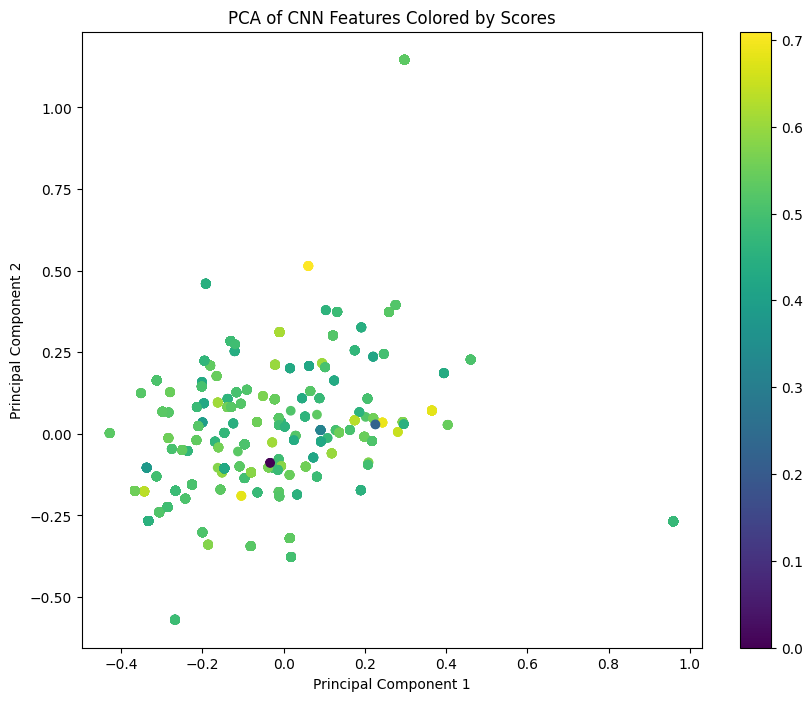

In [32]:
import matplotlib.pyplot as plt

def plot_pca_results(components, scores):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(components[:, 0], components[:, 1], c=scores, cmap='viridis')
    plt.colorbar(scatter)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of CNN Features Colored by Scores')
    plt.show()

plot_pca_results(principal_components, scores)


# CNN Error Analysis

In [33]:
test_df.drop(['user_id', 'target_image', 'target_positive_prompt', 'target_negative_prompt', 
                'target_image_embedding', 'target_positive_text_embedding', 'target_negative_text_embedding',
                'generated_image_embedding', 'generated_positive_text_embedding', 'generated_negative_text_embedding',
                'ai_model_name', 'trajectory_index', 'filtered_image', 'human_rating', 'generated_image', 'generated_positive_prompt', 
               'generated_negative_prompt', 'time_taken'], axis=1, inplace=True)

In [34]:
boolean_columns = ['Famous person?', 'Famous landmark?', 'Manmade?', 'People?', 'Real image?', 'AI image?', 'Art?', 'Nature?', 'City?', 'Fantasy?', 'Sci-fi or space?']
for col in boolean_columns:
    test_df[col] = test_df[col].astype(int) #convert into integers not boolean values
#test_df = test_df.dropna(subset=['steerability_score'])
test_df

,target_id,Famous person?,Famous landmark?,Manmade?,People?,Real image?,AI image?,Art?,Nature?,City?,Fantasy?,Sci-fi or space?,score,predicted_scores
29084,d41a7b440d67b95c,0,0,1,0,0,1,0,0,0,1,0,0.526304,0.530736
12377,5db1bf97d296fb7c,0,0,1,0,0,1,1,0,1,0,0,0.505482,0.506530
4040,bd9a5774ac82b921,0,0,0,0,1,0,0,1,0,0,1,0.577739,0.584953
46805,4ef627fefc564f60,0,0,1,0,0,1,1,0,0,0,0,0.484464,0.486542
21695,e03b4bdfa4b6528a,0,0,1,1,1,0,1,0,0,0,0,0.446108,0.438776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30922,78d95d7bc56a9a1c,0,0,1,1,0,1,0,0,0,0,0,0.492520,0.489888
34662,270ae531dbb5da1e,0,1,1,0,0,1,1,0,0,0,1,0.552210,0.554482
16325,ce64778d039fed0f,0,0,1,0,0,1,1,0,0,1,0,0.470275,0.468666
45468,b45d006e147d2ec6,0,0,1,0,0,1,1,1,0,1,0,0.584414,0.586143


In [41]:
#calculate error on test data
test_df['Error'] = (test_df['score']-test_df['predicted_scores'])

test_df['SquareError'] = (test_df['Error'])**2
test_df

,target_id,Famous person?,Famous landmark?,Manmade?,People?,Real image?,AI image?,Art?,Nature?,City?,Fantasy?,Sci-fi or space?,score,predicted_scores,Error,SquareError
29084,d41a7b440d67b95c,0,0,1,0,0,1,0,0,0,1,0,0.526304,0.530736,-0.004432,1.963922e-05
12377,5db1bf97d296fb7c,0,0,1,0,0,1,1,0,1,0,0,0.505482,0.506530,-0.001047,1.096722e-06
4040,bd9a5774ac82b921,0,0,0,0,1,0,0,1,0,0,1,0.577739,0.584953,-0.007214,5.204467e-05
46805,4ef627fefc564f60,0,0,1,0,0,1,1,0,0,0,0,0.484464,0.486542,-0.002077,4.315390e-06
21695,e03b4bdfa4b6528a,0,0,1,1,1,0,1,0,0,0,0,0.446108,0.438776,0.007332,5.376441e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30922,78d95d7bc56a9a1c,0,0,1,1,0,1,0,0,0,0,0,0.492520,0.489888,0.002631,6.924787e-06
34662,270ae531dbb5da1e,0,1,1,0,0,1,1,0,0,0,1,0.552210,0.554482,-0.002272,5.161672e-06
16325,ce64778d039fed0f,0,0,1,0,0,1,1,0,0,1,0,0.470275,0.468666,0.001608,2.587195e-06
45468,b45d006e147d2ec6,0,0,1,0,0,1,1,1,0,1,0,0.584414,0.586143,-0.001730,2.992145e-06


In [42]:
#test one column to make sure syntax works
print(pd.DataFrame.mean( (test_df[test_df['Famous person?'] == 1 ])['SquareError'] ) )

2.1634034599592722e-05


In [43]:
#for all the images that have true values for each feature, add average error to list
avg_err_by_feature = []
for feature in boolean_columns:
    avg_err_by_feature.append(pd.DataFrame.mean((test_df[test_df[feature] == 1 ])['SquareError']))
print(avg_err_by_feature)

#convert to dictionary for interpretability
err_dict = {}
for i in range(len(boolean_columns)):
    err_dict[boolean_columns[i]] = avg_err_by_feature[i]
print(err_dict)

[2.1634034599592722e-05, 1.0451249254816545e-05, 1.2491224878883187e-05, 1.2590636500159617e-05, 3.771567358192726e-05, 8.216446582923347e-06, 9.16852738288297e-06, 4.982748224528887e-06, 1.00002213432175e-05, 8.514351912689656e-06, 1.1632047971509392e-05]
{'Famous person?': 2.1634034599592722e-05, 'Famous landmark?': 1.0451249254816545e-05, 'Manmade?': 1.2491224878883187e-05, 'People?': 1.2590636500159617e-05, 'Real image?': 3.771567358192726e-05, 'AI image?': 8.216446582923347e-06, 'Art?': 9.16852738288297e-06, 'Nature?': 4.982748224528887e-06, 'City?': 1.00002213432175e-05, 'Fantasy?': 8.514351912689656e-06, 'Sci-fi or space?': 1.1632047971509392e-05}


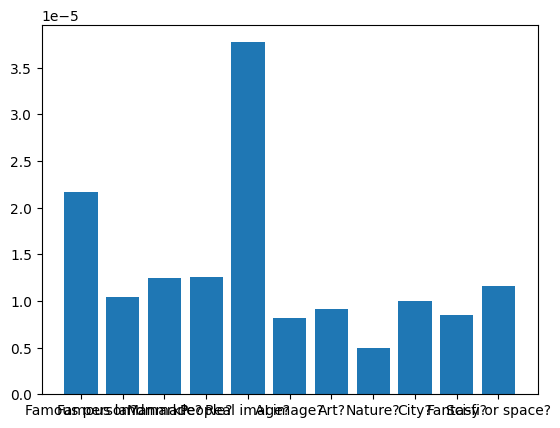

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(boolean_columns,avg_err_by_feature)
plt.show()